In [2]:
import re
import sys
from pathlib import Path

import pandas as pd
from IPython.core.display_functions import display
from matplotlib import pyplot as plt
from matplotlib.image import AxesImage

sys.path.append(str(Path.cwd().parent))
sys.path.append(str(Path.cwd()))
from data_analysis.CLI import ExperimentDir

In [3]:
exp = ExperimentDir.LOCAL
if len(sys.argv) > 1:
    try:
        exp = ExperimentDir.value_to_enum(sys.argv[1])
    except ValueError as e:
        print(f"Experiment was set to {exp}", e)

exp_dir = Path(ExperimentDir.host_dir(exp)) / 'runs'
pngs = list(exp_dir.glob('run.*.parsed/*png'))

generic_config_regex = r".+?\.(.+?)-(.+?)(?:-(.+?))_(.+?)-(\d+)\.cfg.+"
local_config_regex = r".+?\.(.+?)-(.+?)-nc(\d+)_(.+?)-(\d+)\.cfg.+"
extract_params_from_config = lambda cfg: re.match(local_config_regex,
                                                  cfg).groups()
extract_cfg_name = lambda cfg: re.match(r"^.+?\.(.+?)\..+$", cfg).group(1)

configs = []
for png in pngs:
    workflow, mode, ncores, node, trial = extract_params_from_config(png.parent.name)
    configs.append({
        'cfg_name': extract_cfg_name(png.parent.name),
        'path': png,
        'workflow': workflow,
        "mode": mode,
        'ncores': int(ncores),
        'node': node,
        'trial': int(trial),
        'image_name': png.name,
    })

df = pd.DataFrame(configs, columns=['cfg_name', 'path', 'workflow', 'mode', 'ncores', 'node', 'trial', 'image_name'])
df

Experiment was set to ExperimentDir.LOCAL -f is not a valid value in ExperimentType, should be one of ['exp-local', 'exp-hpc', 'exp-mpi']


cfg_name                                               path  \
0    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
1    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
2    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
3    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
4    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
..                     ...                                                ...   
344    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
345    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
346    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
347    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   
348    dpp-local-nc8_ss2-9  ..\examples\exp-local\runs\run.dpp-local-nc8_s...   

    workflow   mode  ncores node  trial                  image_name  
0        daa  local      16  gl5     41        run_avg_cpu_freq.png  
1        daa  local      16  gl5     41    run_avg_cpu_util_all.png  
2        daa  local      16  gl5     41  run_avg_cpu_util_every.png  
3        daa  local      16  gl5     41        run_avg_mem_util.png  
4        daa  local      16  gl5     41      run_avg_normalized.png  
..       ...    ...     ...  ...    ...                         ...  
344      dpp  local       8  ss2      9        run_avg_cpu_freq.png  
345      dpp  local       8  ss2      9    run_avg_cpu_util_all.png  
346      dpp  local       8  ss2      9  run_avg_cpu_util_every.png  
347      dpp  local       8  ss2      9        run_avg_mem_util.png  
348      dpp  local       8  ss2      9      run_avg_normalized.png  

[349 rows x 8 columns]

In [4]:
data_gathered = df.groupby(['image_name', 'mode', 'workflow', 'ncores']).size().reset_index(name='count')
data_gathered.to_csv('info.csv', index=False)
data_gathered

image_name   mode workflow  ncores  count
0         run_avg_cpu_freq.png  local      daa       4     12
1         run_avg_cpu_freq.png  local      daa       8     13
2         run_avg_cpu_freq.png  local      daa      16      3
3         run_avg_cpu_freq.png  local      daa      32      2
4         run_avg_cpu_freq.png  local      dpp       4     16
5         run_avg_cpu_freq.png  local      dpp       8     18
6         run_avg_cpu_freq.png  local      dpp      16      9
7         run_avg_cpu_freq.png  local      dpp      32     12
8     run_avg_cpu_util_all.png  local      daa       4     10
9     run_avg_cpu_util_all.png  local      daa       8      9
10    run_avg_cpu_util_all.png  local      daa      16      3
11    run_avg_cpu_util_all.png  local      daa      32      2
12    run_avg_cpu_util_all.png  local      dpp       4     10
13    run_avg_cpu_util_all.png  local      dpp       8     15
14    run_avg_cpu_util_all.png  local      dpp      16      7
15    run_avg_cpu_util_all.png  local      dpp      32     10
16  run_avg_cpu_util_every.png  local      daa       4     10
17  run_avg_cpu_util_every.png  local      daa       8      9
18  run_avg_cpu_util_every.png  local      daa      16      3
19  run_avg_cpu_util_every.png  local      daa      32      2
20  run_avg_cpu_util_every.png  local      dpp       4     10
21  run_avg_cpu_util_every.png  local      dpp       8     15
22  run_avg_cpu_util_every.png  local      dpp      16      7
23  run_avg_cpu_util_every.png  local      dpp      32     10
24        run_avg_mem_util.png  local      daa       4     10
25        run_avg_mem_util.png  local      daa       8      9
26        run_avg_mem_util.png  local      daa      16      3
27        run_avg_mem_util.png  local      daa      32      2
28        run_avg_mem_util.png  local      dpp       4     10
29        run_avg_mem_util.png  local      dpp       8     15
30        run_avg_mem_util.png  local      dpp      16      7
31        run_avg_mem_util.png  local      dpp      32     10
32      run_avg_normalized.png  local      daa       4     10
33      run_avg_normalized.png  local      daa       8      9
34      run_avg_normalized.png  local      daa      16      3
35      run_avg_normalized.png  local      daa      32      2
36      run_avg_normalized.png  local      dpp       4     10
37      run_avg_normalized.png  local      dpp       8     15
38      run_avg_normalized.png  local      dpp      16      7
39      run_avg_normalized.png  local      dpp      32     10

In [5]:
data_gathered_by_node = df.groupby(['image_name', 'mode', 'workflow', 'ncores', 'node']).size().reset_index(
    name='count')
data_gathered_by_node.to_csv('info.by_node.csv', index=False)
data_gathered_by_node

image_name   mode workflow  ncores node  count
0     run_avg_cpu_freq.png  local      daa       4  gl5      6
1     run_avg_cpu_freq.png  local      daa       4  ss2      6
2     run_avg_cpu_freq.png  local      daa       8  gl5      7
3     run_avg_cpu_freq.png  local      daa       8  ss2      6
4     run_avg_cpu_freq.png  local      daa      16  gl5      1
..                     ...    ...      ...     ...  ...    ...
80  run_avg_normalized.png  local      dpp       8  ss2      6
81  run_avg_normalized.png  local      dpp      16  gl5      4
82  run_avg_normalized.png  local      dpp      16  ss2      3
83  run_avg_normalized.png  local      dpp      32  gl5      6
84  run_avg_normalized.png  local      dpp      32  ss2      4

[85 rows x 6 columns]

In [6]:
workflow = 'daa'
image_name = 'run_avg_cpu_util_all.png'
df_slice = df[(df.workflow == workflow) & (df.image_name == image_name)]
df_slice

cfg_name                                               path  \
1    daa-local-nc16_gl5-41  ..\examples\exp-local\runs\run.daa-local-nc16_...   
6    daa-local-nc16_gl6-42  ..\examples\exp-local\runs\run.daa-local-nc16_...   
11   daa-local-nc16_ss2-13  ..\examples\exp-local\runs\run.daa-local-nc16_...   
16   daa-local-nc32_gl5-43  ..\examples\exp-local\runs\run.daa-local-nc32_...   
21   daa-local-nc32_ss2-12  ..\examples\exp-local\runs\run.daa-local-nc32_...   
26    daa-local-nc4_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
31    daa-local-nc4_gl5-32  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
36    daa-local-nc4_gl5-33  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
41    daa-local-nc4_gl5-34  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
46    daa-local-nc4_gl5-35  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
51    daa-local-nc4_gl5-37  ..\examples\exp-local\runs\run.daa-local-nc4_g...   
57     daa-local-nc4_ss2-3  ..\examples\exp-local\runs\run.daa-local-nc4_s...   
63     daa-local-nc4_ss2-5  ..\examples\exp-local\runs\run.daa-local-nc4_s...   
68     daa-local-nc4_ss2-6  ..\examples\exp-local\runs\run.daa-local-nc4_s...   
73     daa-local-nc4_ss2-8  ..\examples\exp-local\runs\run.daa-local-nc4_s...   
78    daa-local-nc8_gl5-31  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
83    daa-local-nc8_gl5-32  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
88    daa-local-nc8_gl5-34  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
93    daa-local-nc8_gl5-35  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
98    daa-local-nc8_gl5-36  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
103   daa-local-nc8_gl5-37  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
108   daa-local-nc8_gl5-38  ..\examples\exp-local\runs\run.daa-local-nc8_g...   
113    daa-local-nc8_ss2-2  ..\examples\exp-local\runs\run.daa-local-nc8_s...   
122    daa-local-nc8_ss2-8  ..\examples\exp-local\runs\run.daa-local-nc8_s...   

    workflow   mode  ncores node  trial                image_name  
1        daa  local      16  gl5     41  run_avg_cpu_util_all.png  
6        daa  local      16  gl6     42  run_avg_cpu_util_all.png  
11       daa  local      16  ss2     13  run_avg_cpu_util_all.png  
16       daa  local      32  gl5     43  run_avg_cpu_util_all.png  
21       daa  local      32  ss2     12  run_avg_cpu_util_all.png  
26       daa  local       4  gl5     31  run_avg_cpu_util_all.png  
31       daa  local       4  gl5     32  run_avg_cpu_util_all.png  
36       daa  local       4  gl5     33  run_avg_cpu_util_all.png  
41       daa  local       4  gl5     34  run_avg_cpu_util_all.png  
46       daa  local       4  gl5     35  run_avg_cpu_util_all.png  
51       daa  local       4  gl5     37  run_avg_cpu_util_all.png  
57       daa  local       4  ss2      3  run_avg_cpu_util_all.png  
63       daa  local       4  ss2      5  run_avg_cpu_util_all.png  
68       daa  local       4  ss2      6  run_avg_cpu_util_all.png  
73       daa  local       4  ss2      8  run_avg_cpu_util_all.png  
78       daa  local       8  gl5     31  run_avg_cpu_util_all.png  
83       daa  local       8  gl5     32  run_avg_cpu_util_all.png  
88       daa  local       8  gl5     34  run_avg_cpu_util_all.png  
93       daa  local       8  gl5     35  run_avg_cpu_util_all.png  
98       daa  local       8  gl5     36  run_avg_cpu_util_all.png  
103      daa  local       8  gl5     37  run_avg_cpu_util_all.png  
108      daa  local       8  gl5     38  run_avg_cpu_util_all.png  
113      daa  local       8  ss2      2  run_avg_cpu_util_all.png  
122      daa  local       8  ss2      8  run_avg_cpu_util_all.png

In [15]:
df_count = df_slice.groupby(['node', 'ncores']).size().reset_index(name='count')
df_max_count_per_ncores = df_count.groupby('ncores')['count'].max().reset_index(name='max_count')
total_count = df_max_count_per_ncores['max_count'].sum()
# df_max
node_order_by_run_count = df_slice.groupby(['node']).size().reset_index(name="count").sort_values(by=['count'],
                                                                                                  ascending=False)
display(df_count, df_max_count_per_ncores,
        node_order_by_run_count.node.values.tolist(),
        total_count)

node  ncores  count
0  gl5       4      6
1  gl5       8      7
2  gl5      16      1
3  gl5      32      1
4  gl6      16      1
5  ss2       4      4
6  ss2       8      2
7  ss2      16      1
8  ss2      32      1

ncores  max_count
0       4          6
1       8          7
2      16          1
3      32          1

['gl5', 'ss2', 'gl6']

15

Generating daa_run_avg_cpu_util_all.png


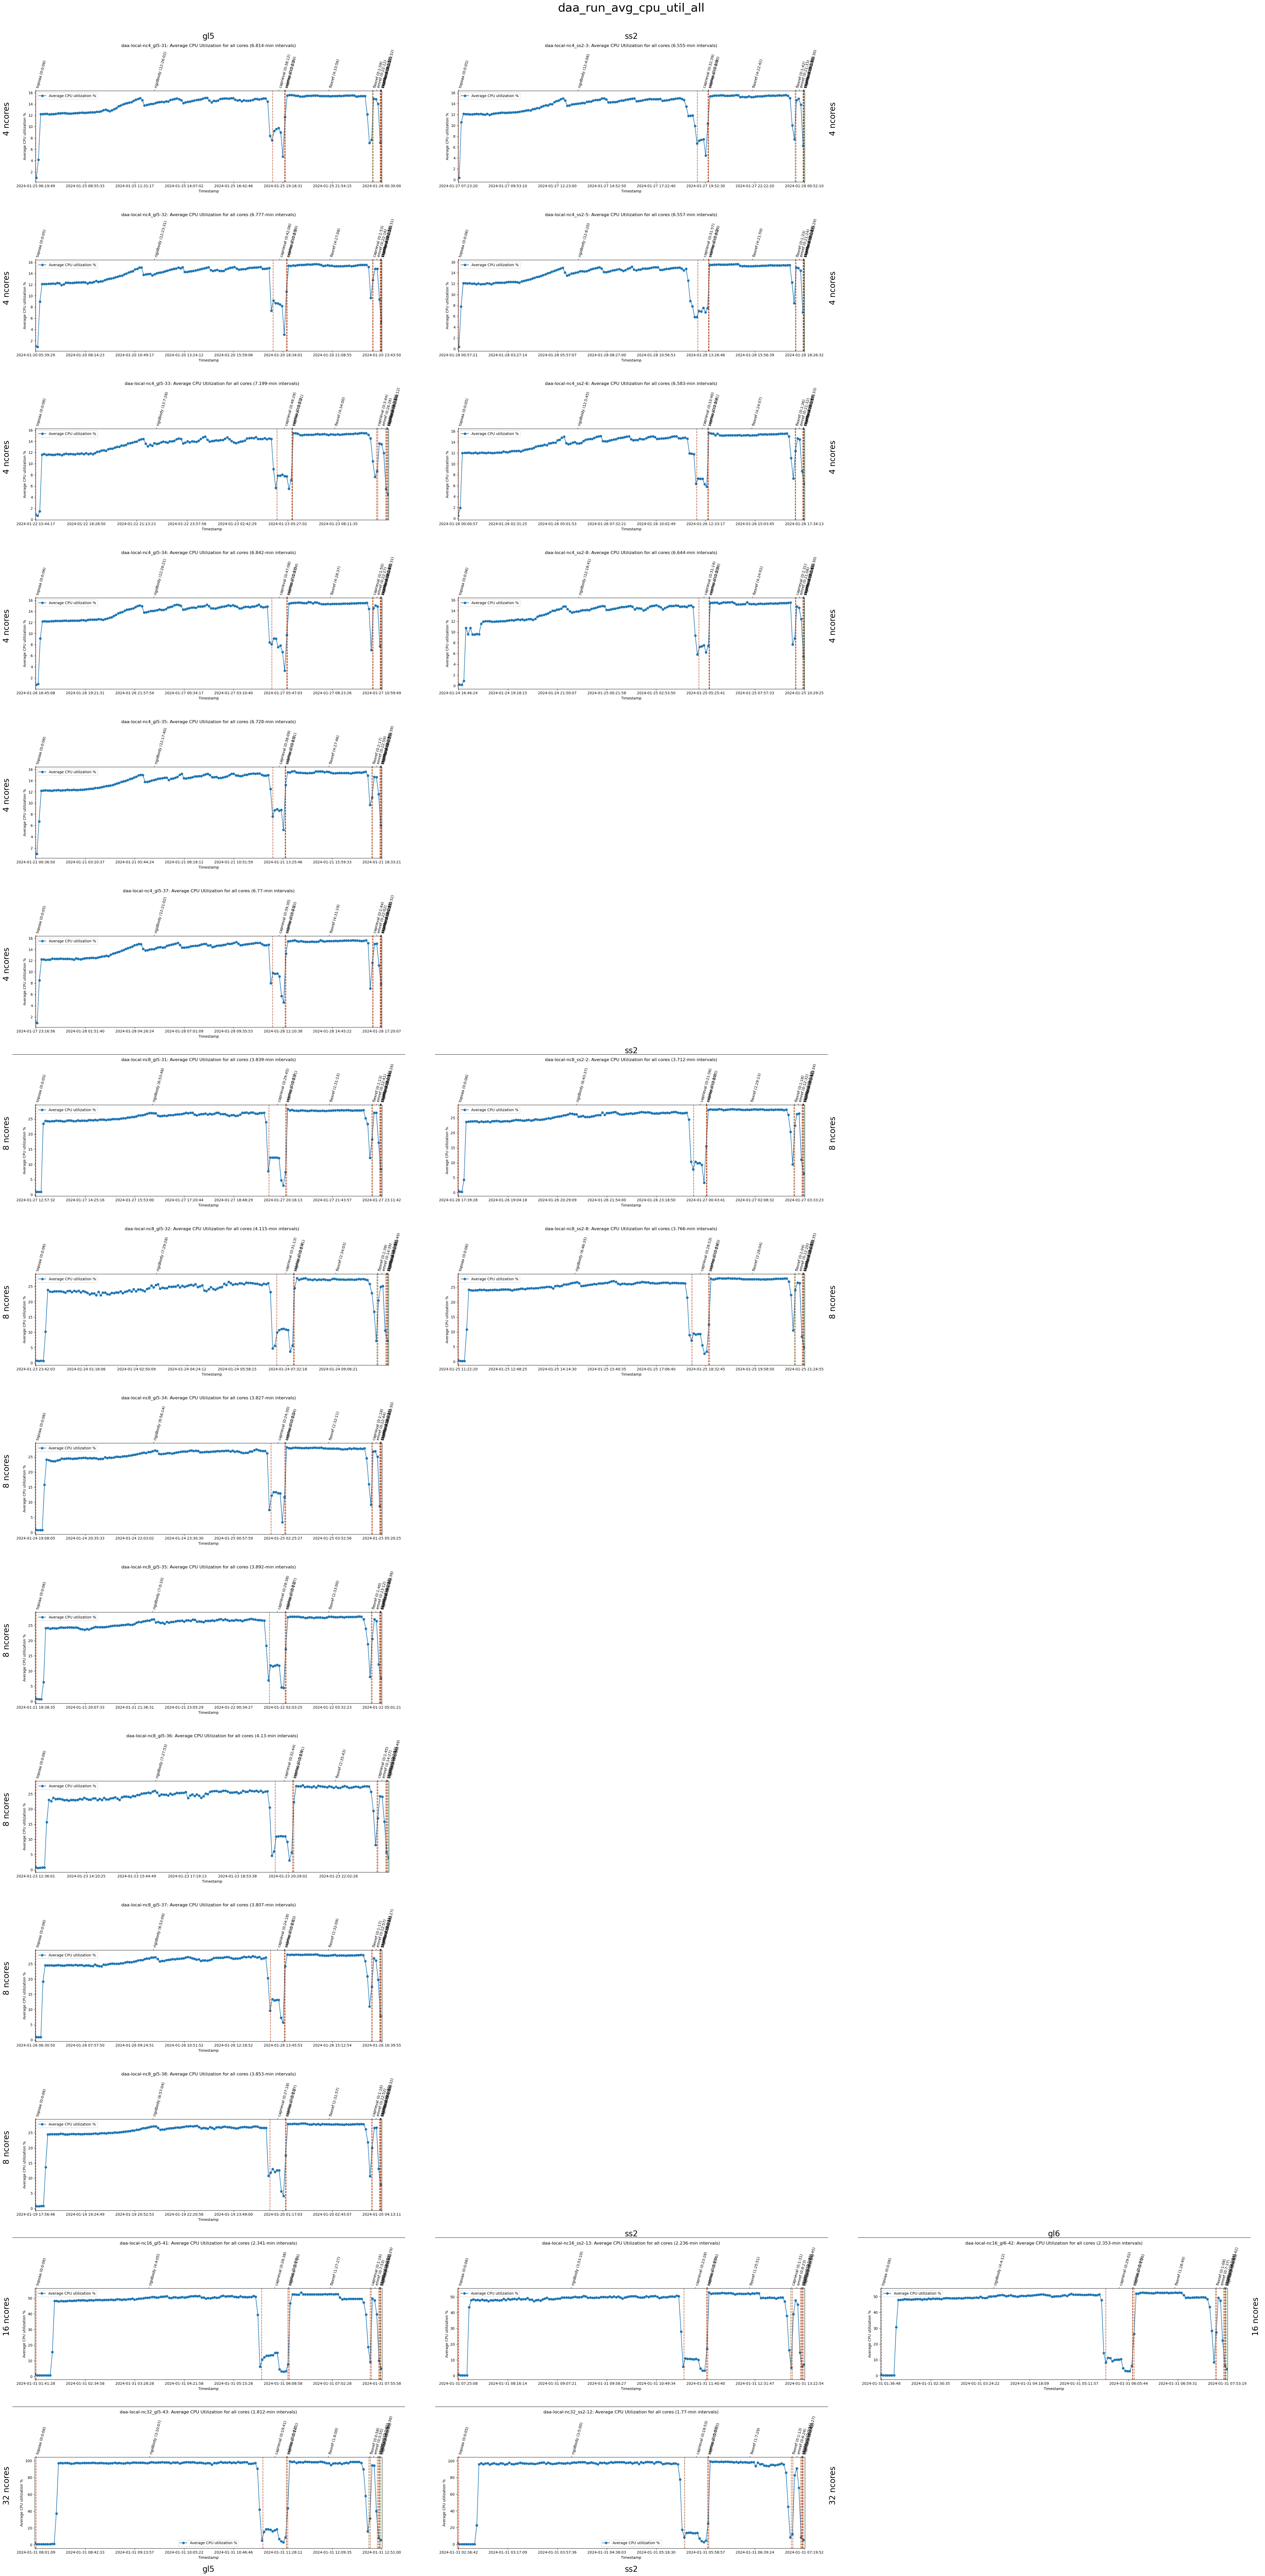

In [37]:
from typing import Set

scale = 3

# df = df[(df.workflow == 'daa') & (df.image_name == 'run_avg_cpu_util_all.png')]

# for unique workflogs
for workflow in df.workflow.unique():
    for image_name in df.image_name.unique():
        img_name = f"{workflow}_{image_name}"
        print(f"Generating {img_name}")

        df_slice = df[(df.workflow == workflow) & (df.image_name == image_name)]
        df_count = df_slice.groupby(['node', 'ncores']).size().reset_index(name='count')
        df_max_count_per_ncores = df_count.groupby('ncores')['count'].max().reset_index(name='max_count')

        n_cols = len(df_slice.node.unique())
        n_rows = df_max_count_per_ncores['max_count'].sum()
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5 * scale, n_rows * 2 * scale))

        node_order_by_run_count = df_slice.groupby(['node']).size().reset_index(name="count").sort_values(
            by=['count']).node.values.tolist()
        plotted = set()
        for col_reverse, node in enumerate(node_order_by_run_count):
            # reverse iteration for correct y_label (ncores) printing
            col = len(node_order_by_run_count) - 1 - col_reverse
            row_offset = 0
            df_slice_node = df_slice[df_slice.node == node]
            for ncore in df_max_count_per_ncores.ncores:
                max_ncore_group_rows = \
                    df_max_count_per_ncores[df_max_count_per_ncores.ncores == ncore].max_count.values[0]
                for ncore_group_row, (_, cfg) in enumerate(df_slice_node[df_slice_node.ncores == ncore].iterrows()):
                    row = row_offset + ncore_group_row
                    plotted.add((row, col))
                    ax[row, col].imshow(plt.imread(cfg.path))
                    ax[row, col].axis('off')


                    def adjust_style(axx):
                        axx.axis('on')
                        axx.set_xticks([])
                        axx.set_yticks([])
                        axx.spines[:].set_visible(False)


                    if col == 0 or not (row, col + 1) in plotted:
                        adjust_style(ax[row, col])
                        ax[row, col].set_ylabel(f"{cfg.ncores} ncores", fontsize=20)
                        ax[row, col].yaxis.set_label_position('right')
                    if col == 0:
                        ax[row, col].yaxis.set_label_position('left')

                    if row == n_rows - 1 or not (row - 1, col) in plotted:
                        adjust_style(ax[row, col])
                        ax[row, col].set_xlabel(f"{node}", fontsize=20)
                        ax[row, col].xaxis.set_label_position('top')
                    if row == n_rows - 1:
                        ax[row, col].xaxis.set_label_position('bottom')

                    # add horizontal line delimited for ncores
                    if ncore_group_row == 0 and row != 0:
                        ax[row, col].spines['top'].set_visible(True)

                row_offset += max_ncore_group_rows

        for i in range(n_cols):
            for j in range(n_rows):
                if not (j, i) in plotted:
                    ax[j, i].axis('off')
                    ax[j, i].set_xticks([])
                    ax[j, i].set_yticks([])

        plt.tight_layout()
        fig.suptitle(f"{workflow}_{image_name.replace('.png', '')}", fontsize=30, y=1.01)

        plt.savefig(img_name)
        # plt.show()

